In [1]:
import pandas as  pd 
import numpy as np
import glob
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import matplotlib
from pylab import mpl
# pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Datas\训练数据\门店数据\门店获取高流量(曝光)\clean_data.csv",encoding = 'utf8')


In [3]:
data.head()

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）,cluster
0,0,20200101,20200131,295680,花生活鲜花（鲜花格格花艺生活馆）,鲜花组,四川省,绵阳,否,20150716,在线,24.0,24.0,6332,84,3,3,1.33,3.57,3,3,578.0,203.00,492.00,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0
1,1,20200101,20200131,642989,花生活鲜花（春季花艺）,鲜花组,安徽省,合肥,否,20151223,在线,24.0,24.0,5822,49,0,0,0.84,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2
2,2,20200101,20200131,653643,花生活鲜花（雅景花艺）,鲜花组,广东省,东莞,否,20190422,在线,10.0,10.4,3053,36,2,2,1.18,5.56,2,2,553.0,347.00,284.00,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2
3,3,20200101,20200131,714142,花生活鲜花（情意浓花店）,鲜花组,浙江省,温州,否,20160129,在线,11.0,11.6,5653,134,10,9,2.37,7.46,10,9,5441.0,1373.09,4371.91,0,0,0,0,0,0,0,0,0,10,0,0,6,6,100.0,2,0,0,2.4,2.4,1.9,0.0,NaN,NaN,2
4,4,20200101,20200131,720330,浪漫花屋,鲜花组,湖北省,荆州,否,20160130,下线,0.0,0.0,1,0,0,0,0.00,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2


In [4]:
# data.info()

In [5]:
data['首次上线日期'] = pd.to_datetime(data['首次上线日期'], format='%Y%m%d')


In [6]:
from datetime import datetime
data['day'] = (datetime.now()-data['首次上线日期']).dt.days

In [7]:
Q1 = 4537.75
Q3 = 12914.75
Q4 = 25480.25
IQR = 8377.0

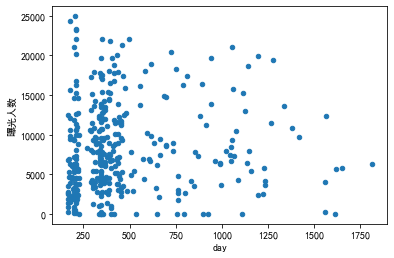

In [8]:
# 查看曝光跟其他指标的数值
# 曝光   时间散点图

mpl.rcParams['font.sans-serif'] = ['SimHei']   # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False    
data.plot.scatter(x='day', y='曝光人数')

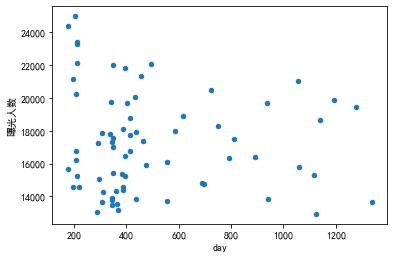

In [9]:
# Q3的曝光
Q3_data = data[data['曝光人数'] > Q3]
Q3_data.plot.scatter(x = 'day', y='曝光人数')

In [11]:
Q3_df = Q3_data[Q3_data['day'] < 280 ]
Q3_df.to_csv('曝光天少.csv')

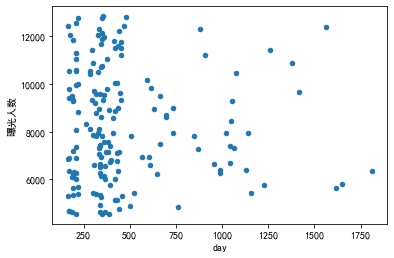

In [32]:


Q2_data = data[(data.曝光人数> 4537) & (data.曝光人数<12914 )]
Q2_data.plot.scatter(x = 'day', y='曝光人数')

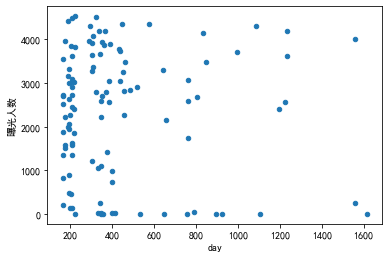

In [13]:
Q1_data = data[data['曝光人数'] < Q1]
Q1_data.plot.scatter(x = 'day', y='曝光人数')

In [ ]:
拿到很大门店的     再拿曝光小的门店    大门店有的指标    然后小门店的指标   在两个表上对比

In [24]:
Q1_df = Q1_data[Q1_data['day'] < 280 ]
Q1_df

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）,cluster,day
263,276,20200101,20200131,7934066,花生活鲜花（艾米拉花店）,鲜花组,四川省,泸州,否,2019-11-26,在线,24.0,24.0,2417,21,1,0,0.87,4.76,1,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,220
264,277,20200101,20200131,7934067,花生活鲜花（浪漫花都）,鲜花组,山西省,运城,否,2019-11-23,在线,21.0,21.2,3818,115,1,0,3.01,0.87,1,0,0.00,0.00,0.00,1,1,0,0,0,0,0,0,0,0,0,0,3,1,33.33,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,223
265,278,20200101,20200131,7934071,花生活鲜花（花艺学院）,鲜花组,福建省,厦门,否,2019-12-05,在线,9.0,9.1,1592,30,1,0,1.88,3.33,1,0,0.00,0.00,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,211
266,279,20200101,20200131,7934074,花生活鲜花（flowerart花心思）,鲜花组,贵州省,贵阳,否,2019-11-23,下线,0.0,0.0,5,0,0,0,0.00,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,223
269,284,20200101,20200131,7994665,花生活鲜花（项诚花艺）,鲜花组,福建省,泉州,否,2019-12-11,在线,24.0,24.0,460,8,0,0,1.74,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,205
270,285,20200101,20200131,7994666,花生活鲜花（遇见花艺鲜花店）,鲜花组,上海市,上海,否,2019-12-06,在线,18.0,18.1,3017,51,3,0,1.69,5.88,4,0,0.00,0.00,0.00,3,2,1,0,0,0,0,0,0,1,0,0,1,1,100.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,210
272,287,20200101,20200131,7994670,花生活鲜花（机缘花艺）,鲜花组,上海市,上海,否,2019-12-09,在线,0.0,0.0,1623,17,0,0,1.05,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,207
278,293,20200101,20200131,8071980,花生活鲜花（云熙花卉鲜花店）,鲜花组,上海市,上海,否,2019-12-08,下线,0.0,0.0,133,3,0,0,2.26,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,208
282,297,20200101,20200131,8094434,花生活鲜花（浩美鲜花礼品）,鲜花组,山西省,吕梁,否,2019-11-23,在线,24.0,24.0,4533,61,0,0,1.35,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,223
285,301,20200101,20200131,8207110,花生活鲜花（花前悦夏鲜花店）,鲜花组,贵州省,毕节,否,2020-01-09,在线,14.0,14.8,1501,14,1,1,0.93,7.14,1,1,504.00,113.01,429.99,0,0,0,0,0,0,0,0,0,1,0,0,2,1,50.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,176


In [25]:

Q1_df = Q1_df.sort_values(by = '曝光人数',ascending = True)
Q1_df

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）,cluster,day
266,279,20200101,20200131,7934074,花生活鲜花（flowerart花心思）,鲜花组,贵州省,贵阳,否,2019-11-23,下线,0.0,0.0,5,0,0,0,0.00,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,223
278,293,20200101,20200131,8071980,花生活鲜花（云熙花卉鲜花店）,鲜花组,上海市,上海,否,2019-12-08,下线,0.0,0.0,133,3,0,0,2.26,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,208
304,320,20200101,20200131,8258613,花生活鲜花（花花世界太仓店）,鲜花组,江苏省,苏州,否,2019-12-18,在线,0.0,0.0,136,5,0,0,3.68,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,198
353,369,20200101,20200131,8471437,花生活鲜花（鑫怡花坊）,鲜花组,上海市,上海,否,2020-01-20,在线,2.0,2.4,204,7,2,1,3.43,28.57,2,1,0.02,0.01,0.01,1,0,1,0,0,0,0,0,0,1,0,0,1,1,100.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,165
269,284,20200101,20200131,7994665,花生活鲜花（项诚花艺）,鲜花组,福建省,泉州,否,2019-12-11,在线,24.0,24.0,460,8,0,0,1.74,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,205
316,332,20200101,20200131,8278384,花生活鲜花（美俪汇花艺）,鲜花组,重庆市,重庆,否,2019-12-20,在线,24.0,24.0,490,61,1,0,12.45,1.64,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,196
308,324,20200101,20200131,8278268,花生活鲜花（慧宇花屋）,鲜花组,天津市,天津,否,2020-01-20,在线,8.0,8.4,813,15,0,0,1.85,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,165
331,347,20200101,20200131,8358888,花生活鲜花（圣格花艺）,鲜花组,辽宁省,沈阳,否,2019-12-20,在线,24.0,24.0,902,14,0,0,1.55,0.00,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,196
354,370,20200101,20200131,8472854,花生活鲜花（简爱花舍）,鲜花组,上海市,上海,否,2020-01-21,在线,15.0,15.0,1342,24,1,1,1.79,4.17,1,1,245.00,120.00,159.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,164
309,325,20200101,20200131,8278275,花生活鲜花（一间花店）,鲜花组,福建省,厦门,否,2019-12-05,在线,7.0,6.8,1353,71,5,2,5.25,7.04,4,2,690.00,281.00,487.00,1,1,0,0,0,0,0,0,0,5,0,0,4,4,100.00,2,0,0,0.0,0.0,0.0,0.0,NaN,NaN,2,211


In [26]:
Q1_df.to_csv('曝光天少1.csv')